# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### The goal is to analyse the used cars dataset using visualizations. And based on analysis and the machine learning model results, the goal is to provide clear recommendations to the client.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter('ignore')


In [5]:
df = pd.read_csv("vehicles.csv")

In [6]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


# Data Cleaning

In [7]:
df.isna().sum() / len(df)

id              0.000000
region          0.000000
price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
VIN             0.377254
drive           0.305863
size            0.717675
type            0.217527
paint_color     0.305011
state           0.000000
dtype: float64

In [8]:
# Lets look into the numerical columns of our dataset

In [9]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [10]:
# I am going to select the features with only less than 30% missing values

In [11]:
data = df[["region","price","year","manufacturer","model","fuel","odometer","title_status",
 "transmission","type","state"]]

In [12]:
data.head()


,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [13]:
#lets look into the missing values again
data.isna().sum()

region              0
price               0
year             1205
manufacturer    17646
model            5277
fuel             3013
odometer         4400
title_status     8242
transmission     2556
type            92858
state               0
dtype: int64

In [14]:
#Let's check for duplicate values
data.duplicated().sum()

57019

In [15]:
data = data.drop_duplicates()

In [16]:
data.shape

(369861, 11)

In [17]:
data.isnull().sum()

region              0
price               0
year              986
manufacturer    15196
model            4675
fuel             2437
odometer         3394
title_status     6693
transmission     2035
type            78689
state               0
dtype: int64

In [18]:
#dropping the null data since we have more data for analysis
data_final = data.dropna()

In [19]:
data_final.shape

(268487, 11)

In [20]:
data_final.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
state           0
dtype: int64

In [21]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268487 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        268487 non-null  object 
 1   price         268487 non-null  int64  
 2   year          268487 non-null  float64
 3   manufacturer  268487 non-null  object 
 4   model         268487 non-null  object 
 5   fuel          268487 non-null  object 
 6   odometer      268487 non-null  float64
 7   title_status  268487 non-null  object 
 8   transmission  268487 non-null  object 
 9   type          268487 non-null  object 
 10  state         268487 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 24.6+ MB


In [22]:
data_final['type'].value_counts()

sedan          69860
SUV            61594
pickup         36403
truck          27281
other          17866
coupe          15685
hatchback      13656
wagon           8607
van             6584
convertible     6140
mini-van        4027
offroad          516
bus              268
Name: type, dtype: int64

In [23]:
data_final['model'].value_counts()

f-150                        5043
silverado 1500               3270
1500                         2499
camry                        1859
accord                       1853
                             ... 
mustang gt convertible 2d       1
maquis brougham                 1
escalade 4wd 4dr luxury         1
slk-class 2dr                   1
gand wagoneer                   1
Name: model, Length: 18903, dtype: int64

In [24]:
data_final['state'].nunique()

51

# Exploratory Data Analysis

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)


In [26]:
data_final.describe()

,price,year,odometer
count,2.684870e+05,268487.000000,2.684870e+05
mean,4.401537e+04,2012.205950,8.840954e+04
std,8.015888e+06,8.164117,1.588074e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,6.988000e+03,2010.000000,3.244350e+04
50%,1.599500e+04,2014.000000,7.691800e+04
75%,2.799500e+04,2017.000000,1.261360e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [27]:
# Let's visualise the price range

In [28]:
data_final['price'].max()

3736928711

In [29]:
data_final['price'].min()

0

In [30]:
#There are only few values with the price greater than 100k, Let's remove those values so it will be easier to plot

In [31]:
data_final = data_final[data_final['price'] < 100000]

Text(0.5, 1.0, 'Price for used cars')

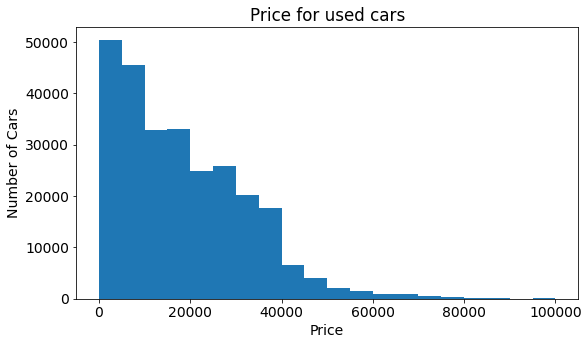

In [32]:
plt.hist(data_final['price'], bins=20)
plt.xlabel("Price")
plt.ylabel("Number of Cars")
plt.title("Price for used cars")

### As we can see in the plot above most of the cars are within the range below 40k

In [33]:
# Let's explore the year 

In [34]:
data_final['year'] = data_final['year'].astype('int')

Text(0.5, 1.0, 'Year for used cars')

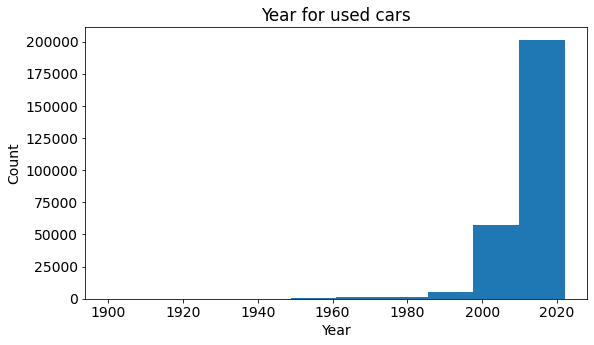

In [35]:
plt.hist(data_final['year'])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Year for used cars")

### As we can see in the plot above most of the cars are from the year 2000

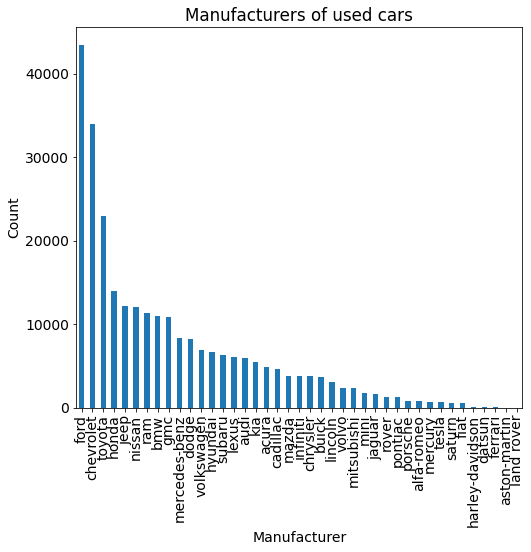

In [36]:
feature='manufacturer'
plt.figure(figsize=(8,7))
data_final[feature].value_counts()\
                .plot(kind='bar')
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.title("Manufacturers of used cars")
plt.show()

### It is clear from the above plot most of the used cars are from the manufacturers, ford, chevrolet, toyota, honda, jeep, nissan etc

Text(0.5, 1.0, 'Manufacturer vs Price')

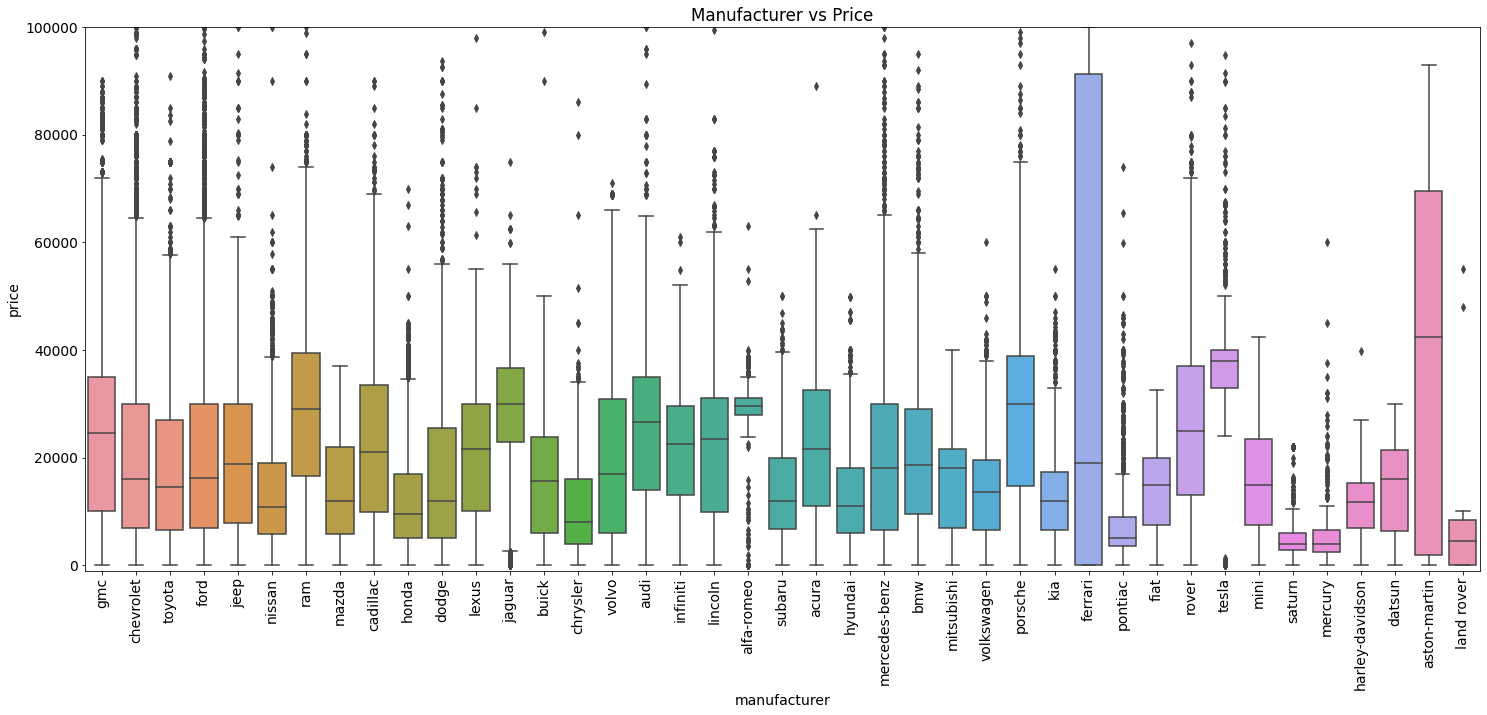

In [37]:
plt.figure(figsize=(25, 10))
plt.ylim(-1000, 100000)
sns.boxplot(x=feature, 
                 y='price', 
                 data=data_final, 
                 linewidth=1.5,
                 )
plt.xticks(rotation=90)
plt.title("Manufacturer vs Price")

### It is clear from above plot the most expensive cars are Ferrari and aston-martin and least expensive cars are Saturn and mercury

In [38]:
data_final['transmission'].value_counts()

automatic    197321
other         57598
manual        13312
Name: transmission, dtype: int64

Text(0.5, 1.0, 'Transmission vs Price')

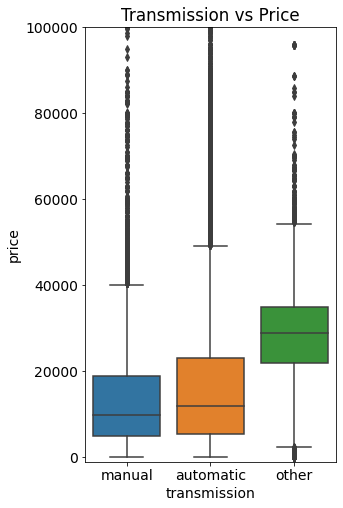

In [39]:
cat_feature = 'transmission'
numerical_feature = 'price'


plt.figure(figsize=(4.5, 8))
plt.ylim(-1000, 100000)
ax = sns.boxplot(x=cat_feature, 
                 y=numerical_feature, 
                 data=data_final, linewidth=1.5,
                 order=['manual', 'automatic', 'other'])

plt.title("Transmission vs Price")

### Looks like the other type of transmission is in the expensive side.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [40]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268231 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        268231 non-null  object 
 1   price         268231 non-null  int64  
 2   year          268231 non-null  int64  
 3   manufacturer  268231 non-null  object 
 4   model         268231 non-null  object 
 5   fuel          268231 non-null  object 
 6   odometer      268231 non-null  float64
 7   title_status  268231 non-null  object 
 8   transmission  268231 non-null  object 
 9   type          268231 non-null  object 
 10  state         268231 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 32.6+ MB


In [41]:
categorical_cols = ['region','manufacturer','model','fuel','title_status',
                    'transmission','type','state']

In [42]:
data_encoded = data_final.copy()

### Let's label encode the categorical columns since there are too many categorical features and one hot encoding takes large space

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in categorical_cols:
    data_encoded[feat] = le.fit_transform(data_encoded[feat].astype(str))

In [44]:
X = data_encoded.drop('price',axis=1)

In [45]:
X.head()

,region,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
27,16,2014,14,14835,2,57923.0,0,2,8,1
28,16,2010,7,15161,2,71229.0,0,2,8,1
29,16,2020,7,15183,2,19160.0,0,2,8,1
30,16,2017,38,17484,2,41124.0,0,2,8,1
31,16,2013,13,7486,2,128000.0,0,0,10,1


In [46]:
y = data_encoded['price']

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
y_prediction = regressor.predict(X_test)


In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.23221020590378771
mean_sqrd_error is== 162208239.0318253
root_mean_squared error of is== 12736.099835971187


## Cross validation

In [51]:
from sklearn.model_selection import cross_val_score

def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)
get_cv_scores(lr)

CV Mean:  0.22998564371574756
STD:  0.004267659862756327




### Ridge Regression

In [53]:
from sklearn.linear_model import Ridge


In [54]:
ridge = Ridge(alpha=1).fit(X_train,y_train)
get_cv_scores(ridge)

CV Mean:  0.22998564315202702
STD:  0.004267666823159545




### Optimal alpha with Grid search

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.22998564371519753
Best Params:  {'alpha': 0.001}


### There is not much change with R2 even after trying with Gridsearch cv

### Lasso Regression

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1).fit(X_train, y_train)
get_cv_scores(lasso)


CV Mean:  0.22998559789287407
STD:  0.0042675591512591335




In [58]:
lasso.coef_

array([-1.57612596e+00,  5.15167283e+02, -7.58215036e+01,  1.04587765e-01,
       -2.31838348e+03, -9.97666094e-03, -9.91207519e+02,  4.96459251e+03,
        1.04953775e+02,  1.05914316e+01])

In [60]:
#Lasso gridsearch cv
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.22998564369938662
Best Params:  {'alpha': 0.001}


In [61]:
#Let's look into the coefficients
for coef, col in enumerate(X_train.columns):
    print(f'{col}:  {lasso.coef_[coef]}')


region:  -1.5761259598138055
year:  515.1672834104565
manufacturer:  -75.8215035783346
model:  0.1045877652584589
fuel:  -2318.3834848898646
odometer:  -0.009976660943974243
title_status:  -991.2075191633256
transmission:  4964.592514780518
type:  104.95377498546478
state:  10.591431606606893


In [64]:
coefficients = grid_result.best_estimator_.coef_

In [75]:
#Let's see how tree based model looks

In [76]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9645136611783782
model score on testing data: 0.7746622158740268


In [77]:
importances = model.feature_importances_

Text(0.5, 1.0, 'Feature Importance plot')

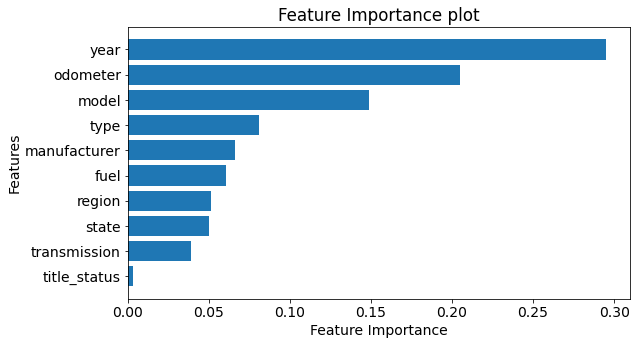

In [79]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance plot")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.



*   The r2 score for the baseline model is 0.23.
*   While for other models such as lasso and ridge, the r2 score is 0.22

*   Not much of a difference, but the tree based model provides good score. And the insights can be provided to the clients with the score 0.96.






### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.



*   Most used are in the range of 40k USD.
*   The transmission "Other" type is slightly more expensive than the manual type cars.
*   The top 5 used cars are from the manufacturers: ford, chevrolet, toyota, honda, jeep, nissan.
*   Saturn and Mercury are the cheapest used cars so far available.
*   The price is mostly determined by the year, odometer, model, type and manufacturer.
*   The least important features are region, state, transmission and title status.

